---
# Zillow Regression Project 
---

---
## Executive Summary
---

---
## Plan
---

---
## Acquire
---

In [1]:
# standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn imports
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler


# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Custom module imports
import wrangle as w
import explore as e

In [2]:
# use function from wrangle module to acquire needed data
# 261, 279
df = w.get_zillow_sfr_data()

In [3]:
df.shape

(28124, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28124 entries, 0 to 28123
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    28124 non-null  float64
 1   bathroomcnt                   28124 non-null  float64
 2   calculatedfinishedsquarefeet  28077 non-null  float64
 3   taxamount                     28123 non-null  float64
 4   taxvaluedollarcnt             28123 non-null  float64
 5   yearbuilt                     28053 non-null  float64
 6   fips                          28124 non-null  float64
 7   transactiondate               28124 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.9+ MB


In [5]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,yearbuilt,fips,transactiondate
0,3.0,2.0,1316.0,2627.48,205123.0,1923.0,6037.0,2017-07-21
1,3.0,2.0,1458.0,2319.90,136104.0,1970.0,6037.0,2017-06-23
2,2.0,1.0,1421.0,543.69,35606.0,1911.0,6037.0,2017-06-30
3,4.0,3.0,2541.0,9819.72,880456.0,2003.0,6059.0,2017-06-01
4,3.0,2.0,1491.0,1399.27,107110.0,1955.0,6037.0,2017-08-23


---
## Prepare
---

In [6]:
df.isna().sum()

bedroomcnt                       0
bathroomcnt                      0
calculatedfinishedsquarefeet    47
taxamount                        1
taxvaluedollarcnt                1
yearbuilt                       71
fips                             0
transactiondate                  0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isna().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxamount                       0
taxvaluedollarcnt               0
yearbuilt                       0
fips                            0
transactiondate                 0
dtype: int64

In [9]:
df.shape

(28048, 8)

In [10]:
df.duplicated().sum()

0

In [11]:
df = df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28048 entries, 0 to 28123
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    28048 non-null  float64
 1   bathroomcnt                   28048 non-null  float64
 2   calculatedfinishedsquarefeet  28048 non-null  float64
 3   taxamount                     28048 non-null  float64
 4   taxvaluedollarcnt             28048 non-null  float64
 5   yearbuilt                     28048 non-null  float64
 6   fips                          28048 non-null  float64
 7   transactiondate               28048 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.9+ MB


In [14]:
df.fips = '0' + df.fips.astype('int').astype('string')

In [15]:
df.bedroomcnt = df.bedroomcnt.astype('int')

In [16]:
df.calculatedfinishedsquarefeet = df.calculatedfinishedsquarefeet.astype('int')

In [17]:
df.yearbuilt = df.yearbuilt.astype('int')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28048 entries, 0 to 28123
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    28048 non-null  int64  
 1   bathroomcnt                   28048 non-null  float64
 2   calculatedfinishedsquarefeet  28048 non-null  int64  
 3   taxamount                     28048 non-null  float64
 4   taxvaluedollarcnt             28048 non-null  float64
 5   yearbuilt                     28048 non-null  int64  
 6   fips                          28048 non-null  string 
 7   transactiondate               28048 non-null  object 
dtypes: float64(3), int64(3), object(1), string(1)
memory usage: 1.9+ MB


In [19]:
df.fips.value_counts()

06037    17886
06059     7742
06111     2420
Name: fips, dtype: Int64

In [20]:
df.transactiondate.value_counts()

2017-06-30    807
2017-05-31    563
2017-07-28    545
2017-08-31    528
2017-05-26    509
             ... 
2017-05-07      1
2017-06-03      1
2017-06-11      1
2017-08-12      1
2017-05-13      1
Name: transactiondate, Length: 119, dtype: int64

In [21]:
df.transactiondate = df.transactiondate.astype('datetime64')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28048 entries, 0 to 28123
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   bedroomcnt                    28048 non-null  int64         
 1   bathroomcnt                   28048 non-null  float64       
 2   calculatedfinishedsquarefeet  28048 non-null  int64         
 3   taxamount                     28048 non-null  float64       
 4   taxvaluedollarcnt             28048 non-null  float64       
 5   yearbuilt                     28048 non-null  int64         
 6   fips                          28048 non-null  string        
 7   transactiondate               28048 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), string(1)
memory usage: 1.9 MB


In [23]:
df.transactiondate

0       2017-07-21
1       2017-06-23
2       2017-06-30
3       2017-06-01
4       2017-08-23
           ...    
28119   2017-08-31
28120   2017-08-31
28121   2017-08-31
28122   2017-08-31
28123   2017-08-31
Name: transactiondate, Length: 28048, dtype: datetime64[ns]

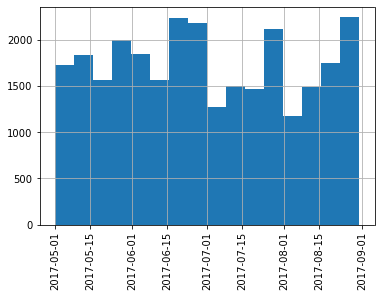

In [24]:
df.transactiondate.hist(bins=16, xrot=90);

In [25]:
# rename columns
df = df.rename(columns={
    'bedroomcnt' : 'bedroom_cnt',
    'bathroomcnt' : "bathroom_cnt",
    'calculatedfinishedsquarefeet' : 'sqft',
    'taxamount' : 'prop_tax',
    'taxvaluedollarcnt' : 'appraised_value',
    'yearbuilt' : 'year_built',
    'transactiondate' : 'transaction_date'
})

In [26]:
num_cols = df.select_dtypes('number').columns.tolist()
num_cols

['bedroom_cnt',
 'bathroom_cnt',
 'sqft',
 'prop_tax',
 'appraised_value',
 'year_built']

In [27]:
for col in num_cols:
    Q1 = np.percentile(df[col], 25, interpolation='midpoint')
    Q3 = np.percentile(df[col], 75, interpolation='midpoint')
    IQR = Q3 - Q1
    UB = Q3 + (1.5 * IQR)
    LB = Q1 - (1.5 * IQR)
    df = df[(df[col] < UB) & (df[col] > LB)]

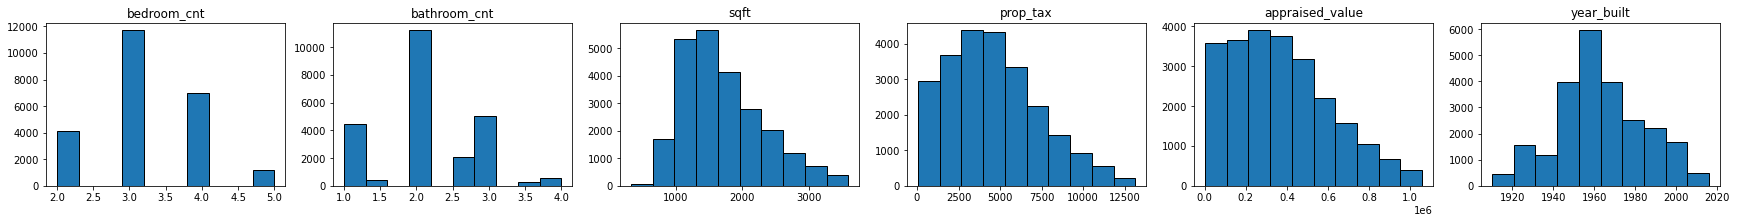

In [28]:
# distributions
plt.figure(figsize=(30, 3))

# List of columns
cols = df.select_dtypes('number').columns.tolist()

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,len(cols), plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    df[col].hist(edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)

In [29]:
# make this into function
def plot_distributions(df):
    
    # distributions
    plt.figure(figsize=(30, 3))
    
    # List of columns
    cols = df.select_dtypes('number').columns.tolist()
    
    for i, col in enumerate(cols):
        
        # i starts at 0, but plot nos should start at 1
        plot_number = i + 1 
        
        # Create subplot.
        plt.subplot(1,len(cols), plot_number)
        
        # Title with column name.
        plt.title(col)
        
        # Display histogram for column.
        df[col].hist(edgecolor='black')
        
        # Hide gridlines.
        plt.grid(False)

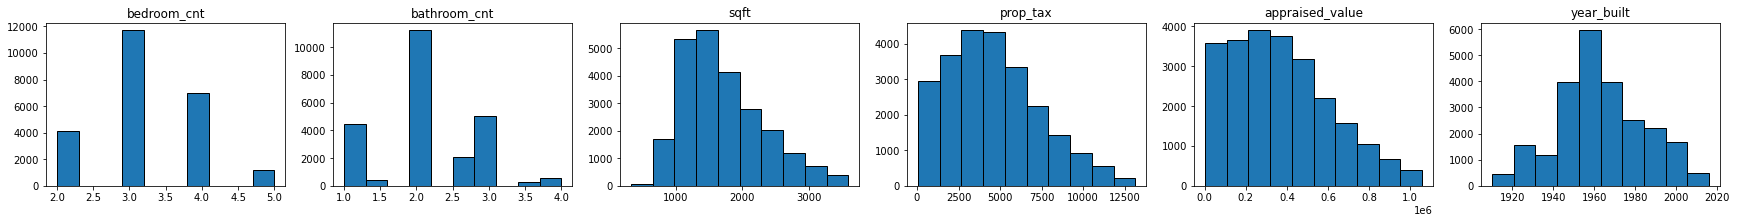

In [30]:
plot_distributions(df)

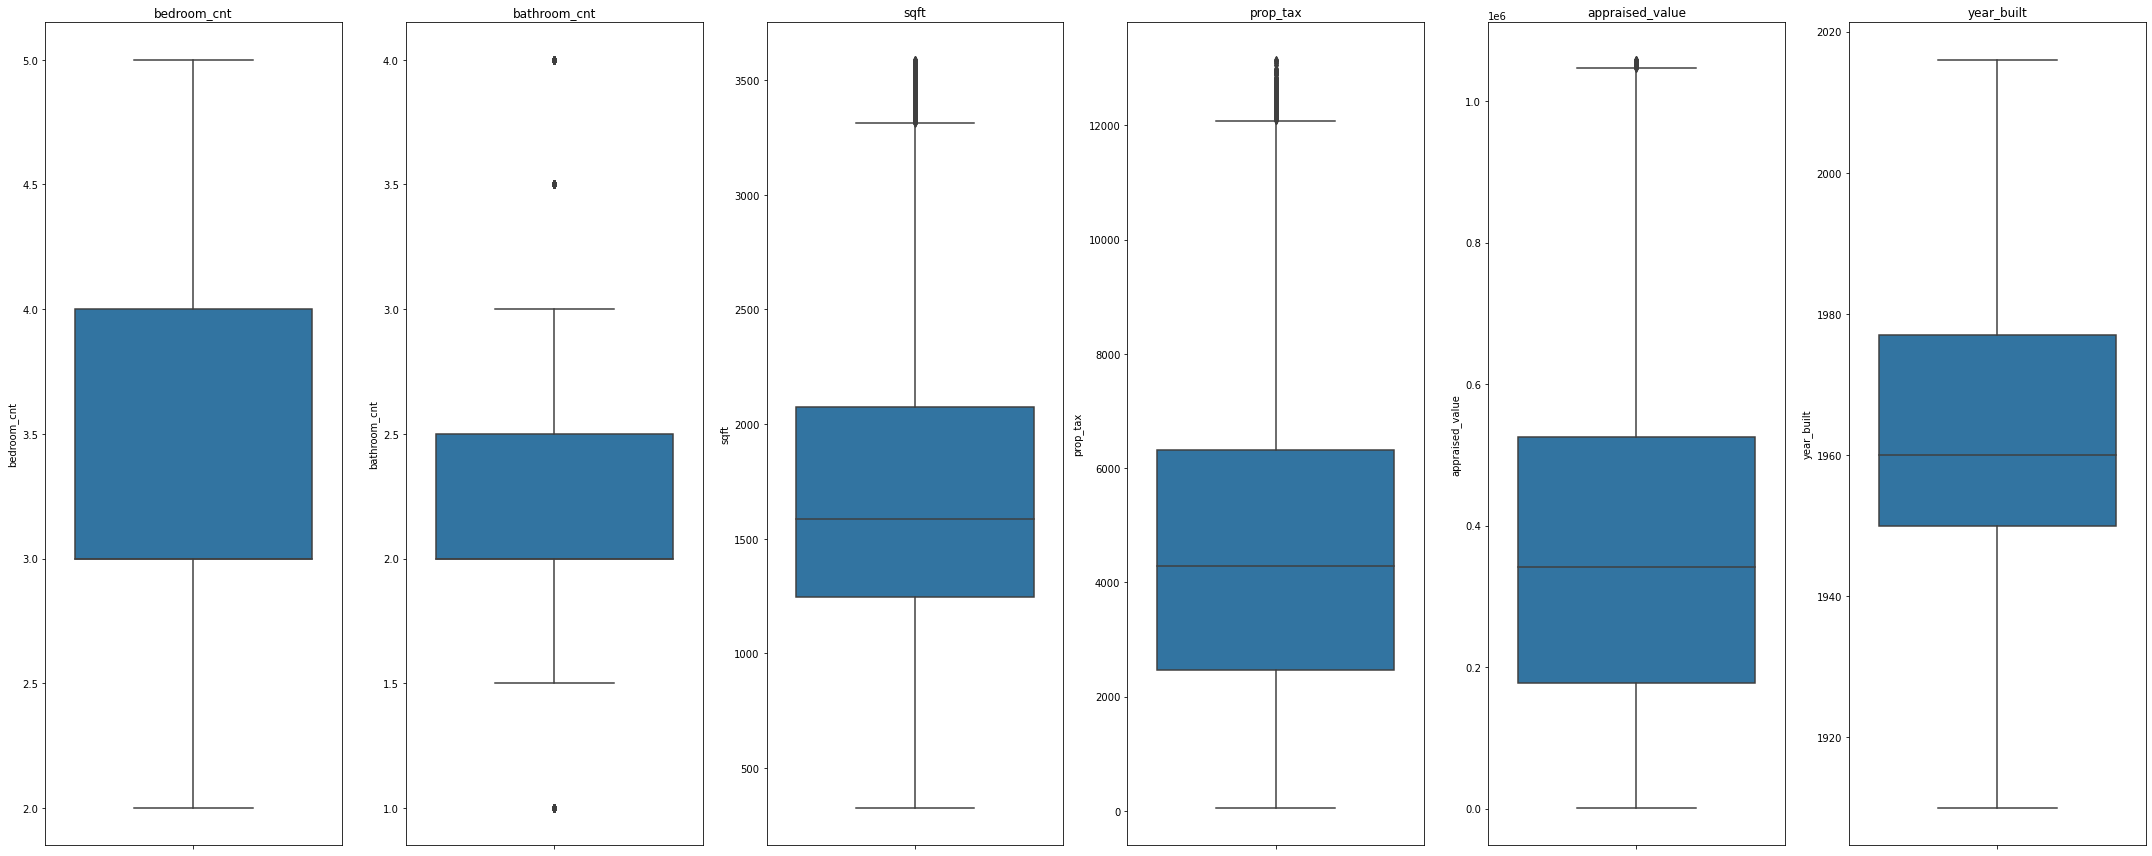

In [31]:
# boxplots
plt.figure(figsize=(30, 12))

# List of columns
cols = df.select_dtypes('number').columns.tolist()

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,len(cols), plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display boxplot for column.
    sns.boxplot(y=col, data=df)
    plt.tight_layout()

In [32]:
# make into function
def plot_boxplots(df):

    plt.figure(figsize=(30, 12))

    # List of columns
    cols = df.select_dtypes('number').columns.tolist()
    
    for i, col in enumerate(cols):
        
        # i starts at 0, but plot nos should start at 1
        plot_number = i + 1 
        
        # Create subplot.
        plt.subplot(1,len(cols), plot_number)
        
        # Title with column name.
        plt.title(col)
        
        # Display boxplot for column.
        sns.boxplot(y=col, data=df)
        plt.tight_layout()

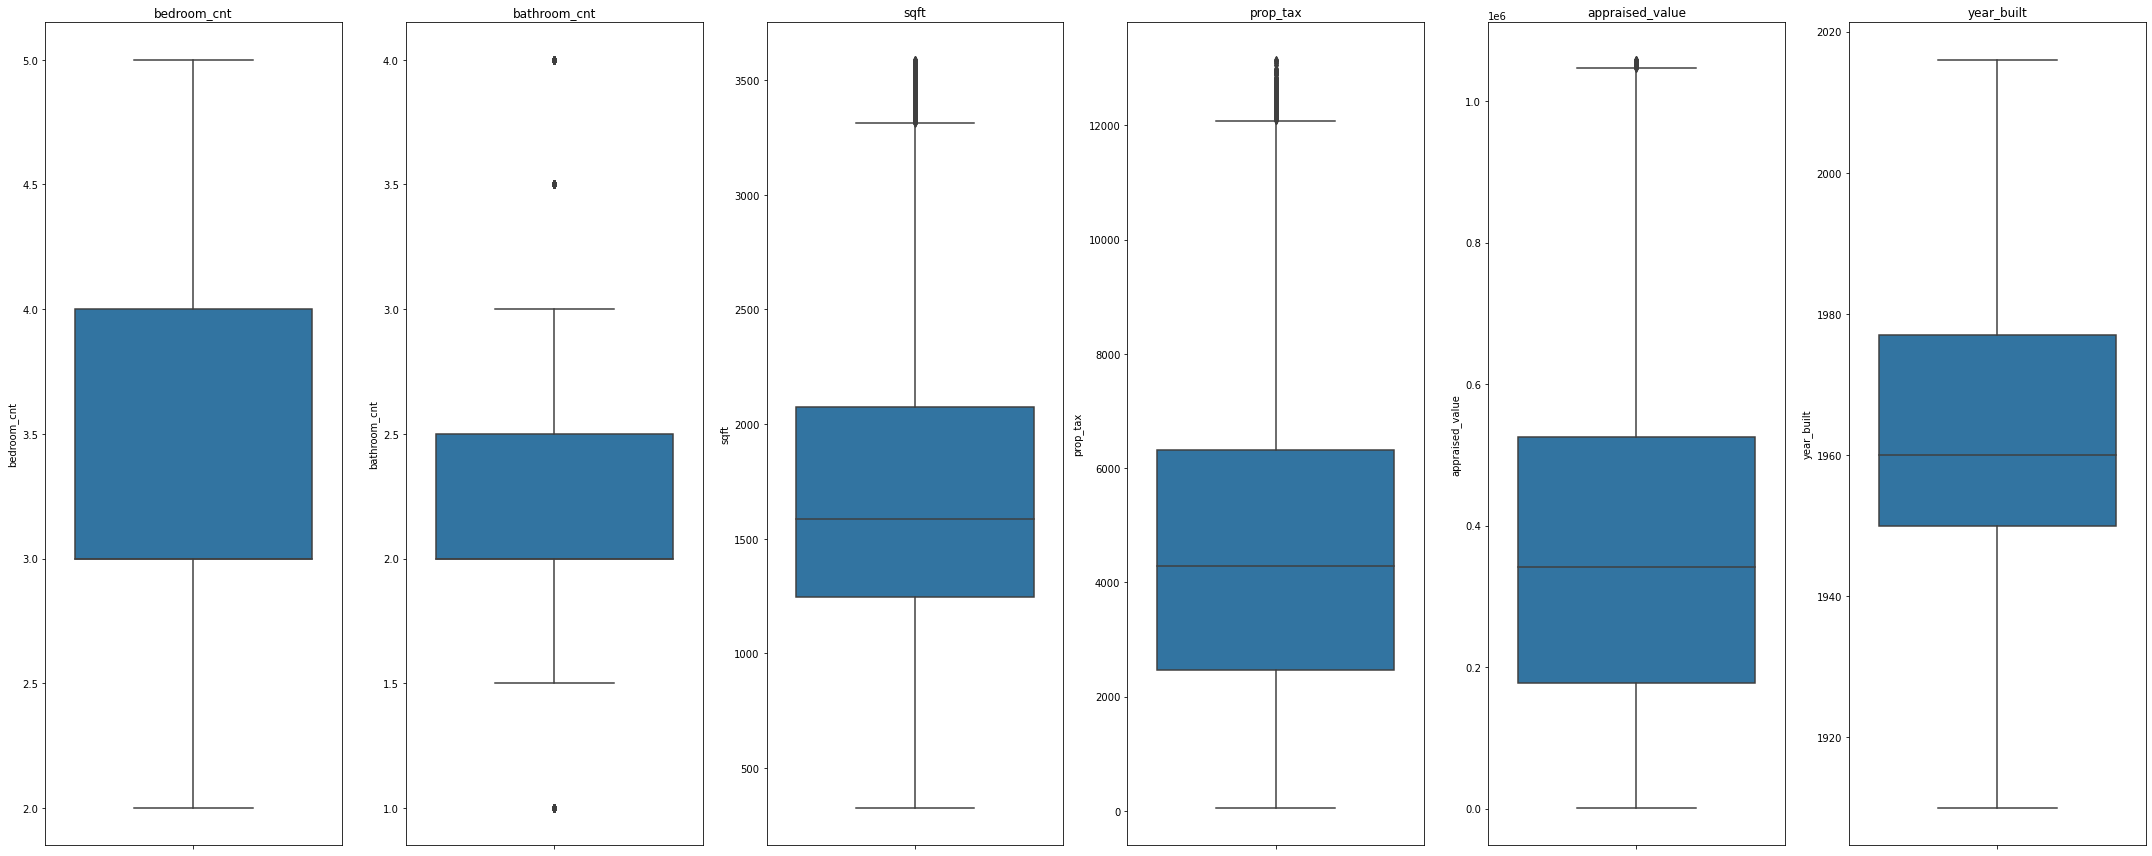

In [33]:
plot_boxplots(df)

In [34]:
df.head()

,bedroom_cnt,bathroom_cnt,sqft,prop_tax,appraised_value,year_built,fips,transaction_date
0,3,2.0,1316,2627.48,205123.0,1923,06037,2017-07-21
1,3,2.0,1458,2319.90,136104.0,1970,06037,2017-06-23
2,2,1.0,1421,543.69,35606.0,1911,06037,2017-06-30
3,4,3.0,2541,9819.72,880456.0,2003,06059,2017-06-01
4,3,2.0,1491,1399.27,107110.0,1955,06037,2017-08-23


In [35]:
# add column for tax rate
df['tax_rate'] = df.prop_tax / df.appraised_value

In [36]:
df.head()

,bedroom_cnt,bathroom_cnt,sqft,prop_tax,appraised_value,year_built,fips,transaction_date,tax_rate
0,3,2.0,1316,2627.48,205123.0,1923,06037,2017-07-21,0.012809
1,3,2.0,1458,2319.90,136104.0,1970,06037,2017-06-23,0.017045
2,2,1.0,1421,543.69,35606.0,1911,06037,2017-06-30,0.015270
3,4,3.0,2541,9819.72,880456.0,2003,06059,2017-06-01,0.011153
4,3,2.0,1491,1399.27,107110.0,1955,06037,2017-08-23,0.013064


In [37]:
# encode
df_modeling = pd.get_dummies(data=df, columns=['fips'])
df_modeling.head()

,bedroom_cnt,bathroom_cnt,sqft,prop_tax,appraised_value,year_built,transaction_date,tax_rate,fips_06037,fips_06059,fips_06111
0,3,2.0,1316,2627.48,205123.0,1923,2017-07-21,0.012809,1,0,0
1,3,2.0,1458,2319.90,136104.0,1970,2017-06-23,0.017045,1,0,0
2,2,1.0,1421,543.69,35606.0,1911,2017-06-30,0.015270,1,0,0
3,4,3.0,2541,9819.72,880456.0,2003,2017-06-01,0.011153,0,1,0
4,3,2.0,1491,1399.27,107110.0,1955,2017-08-23,0.013064,1,0,0


In [38]:
# drop columns not useful for modling
df_modeling = df_modeling.drop(columns=['prop_tax', 'tax_rate', 'transaction_date'])

In [39]:
df_modeling.head()

,bedroom_cnt,bathroom_cnt,sqft,appraised_value,year_built,fips_06037,fips_06059,fips_06111
0,3,2.0,1316,205123.0,1923,1,0,0
1,3,2.0,1458,136104.0,1970,1,0,0
2,2,1.0,1421,35606.0,1911,1,0,0
3,4,3.0,2541,880456.0,2003,0,1,0
4,3,2.0,1491,107110.0,1955,1,0,0


In [40]:
#split encoded
train_encoded, validate_encoded, test_encoded = w.split_zillow(df_modeling)
train_encoded.shape, validate_encoded.shape, test_encoded.shape

((19207, 8), (2374, 8), (2398, 8))

In [41]:
train_encoded.head()

,bedroom_cnt,bathroom_cnt,sqft,appraised_value,year_built,fips_06037,fips_06059,fips_06111
801,4,3.0,1859,349142.0,2005,0,1,0
21286,3,3.0,2130,277000.0,1988,1,0,0
1527,3,1.0,1025,62599.0,1954,1,0,0
4888,3,2.0,1457,367859.0,1986,0,1,0
17662,4,2.0,1386,487000.0,1965,0,1,0


In [42]:
# remove columns derived from target before exploration
df_exploration = df.drop(columns=['prop_tax', 'tax_rate', 'transaction_date'])

In [43]:
# split for exploration
train_explore, validate_explore, test_explore = w.split_zillow(df_exploration)
train_explore.shape, validate_explore.shape, test_explore.shape

((19207, 6), (2374, 6), (2398, 6))

In [44]:
train_explore.head()

,bedroom_cnt,bathroom_cnt,sqft,appraised_value,year_built,fips
801,4,3.0,1859,349142.0,2005,06059
21286,3,3.0,2130,277000.0,1988,06037
1527,3,1.0,1025,62599.0,1954,06037
4888,3,2.0,1457,367859.0,1986,06059
17662,4,2.0,1386,487000.0,1965,06059


In [45]:
# scale
cols = ['bedroom_cnt', 'bathroom_cnt', 'sqft', 'year_built']

In [46]:
train_scaled, validate_scaled, test_scaled = w.add_scaled_columns(train_encoded, validate_encoded, test_encoded, MinMaxScaler(), cols)

In [47]:
train_scaled.head()

,appraised_value,fips_06037,fips_06059,fips_06111,bedroom_cnt_scaled,bathroom_cnt_scaled,sqft_scaled,year_built_scaled
801,349142.0,0,1,0,0.666667,0.666667,0.439222,0.904762
21286,277000.0,1,0,0,0.333333,0.666667,0.527066,0.742857
1527,62599.0,1,0,0,0.333333,0.000000,0.168882,0.419048
4888,367859.0,0,1,0,0.333333,0.333333,0.308914,0.723810
17662,487000.0,0,1,0,0.666667,0.333333,0.285900,0.523810


---
## Explore
---

### Tax Rate Distributions for each County

In [48]:
df.fips.value_counts()

06037    15329
06059     6516
06111     2134
Name: fips, dtype: Int64

**Fips Transation**
- 06037 = Los Angeles County, CA
- 06059 = Orange County, CA
- 06111 = Ventura County, CA

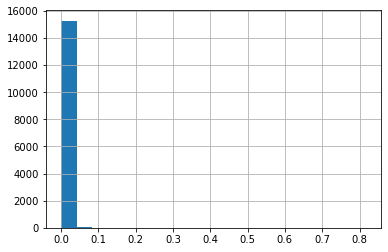

In [49]:
df.tax_rate[df.fips == '06037'].hist(bins=20);

In [50]:
df.tax_rate[df.fips == '06037'].describe()

count    15329.000000
mean         0.014263
std          0.009043
min          0.000857
25%          0.012211
50%          0.012804
75%          0.014663
max          0.816490
Name: tax_rate, dtype: float64

---
### Univariate

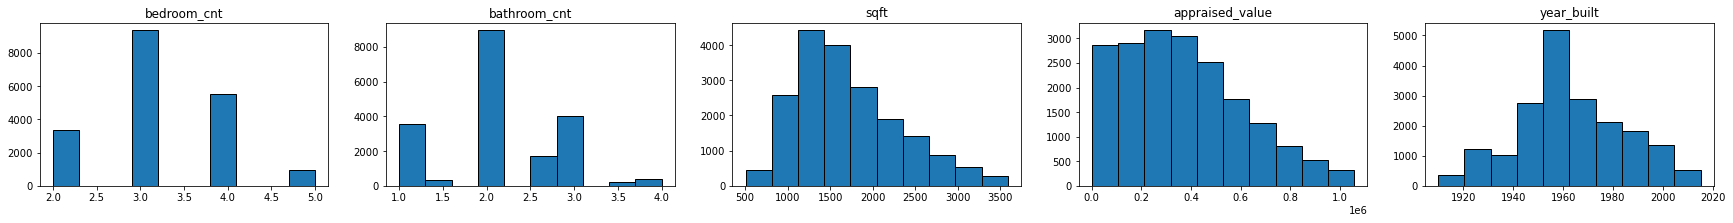

In [51]:
w.plot_distributions(train_explore)

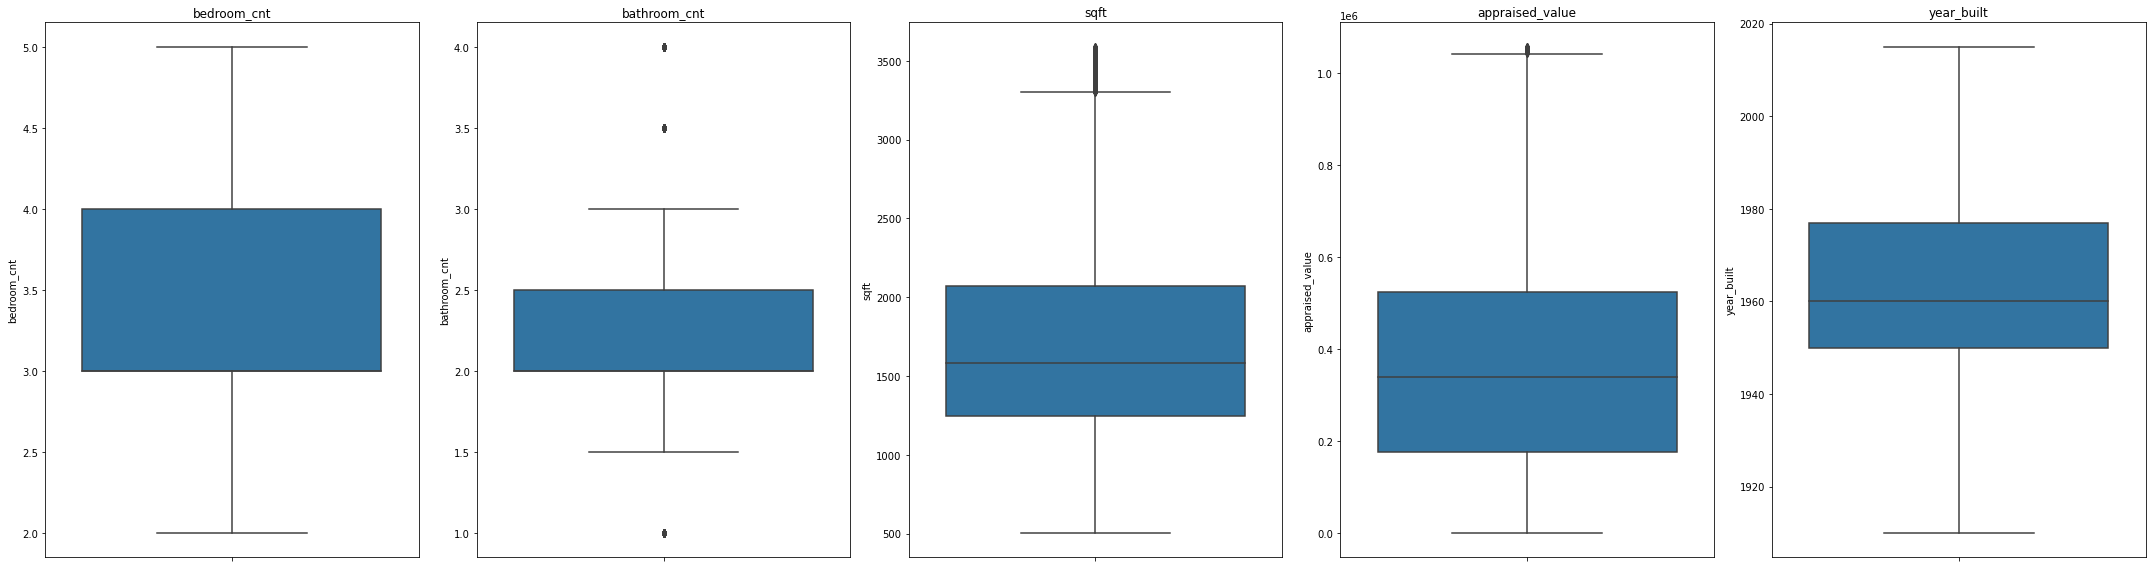

In [52]:
w.plot_boxplots(train_explore)

---
### Bivariate/Multivariate

In [53]:
import explore as e

In [54]:
train_explore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19207 entries, 801 to 12350
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_cnt      19207 non-null  int64  
 1   bathroom_cnt     19207 non-null  float64
 2   sqft             19207 non-null  int64  
 3   appraised_value  19207 non-null  float64
 4   year_built       19207 non-null  int64  
 5   fips             19207 non-null  string 
dtypes: float64(2), int64(3), string(1)
memory usage: 1.0 MB


In [55]:
#e.plot_categorical_and_continuous_vars(train_explore, ['fips'], ['bedroom_cnt', 'bathroom_cnt', 'sqft', 'appraised_value', 'year_built'])

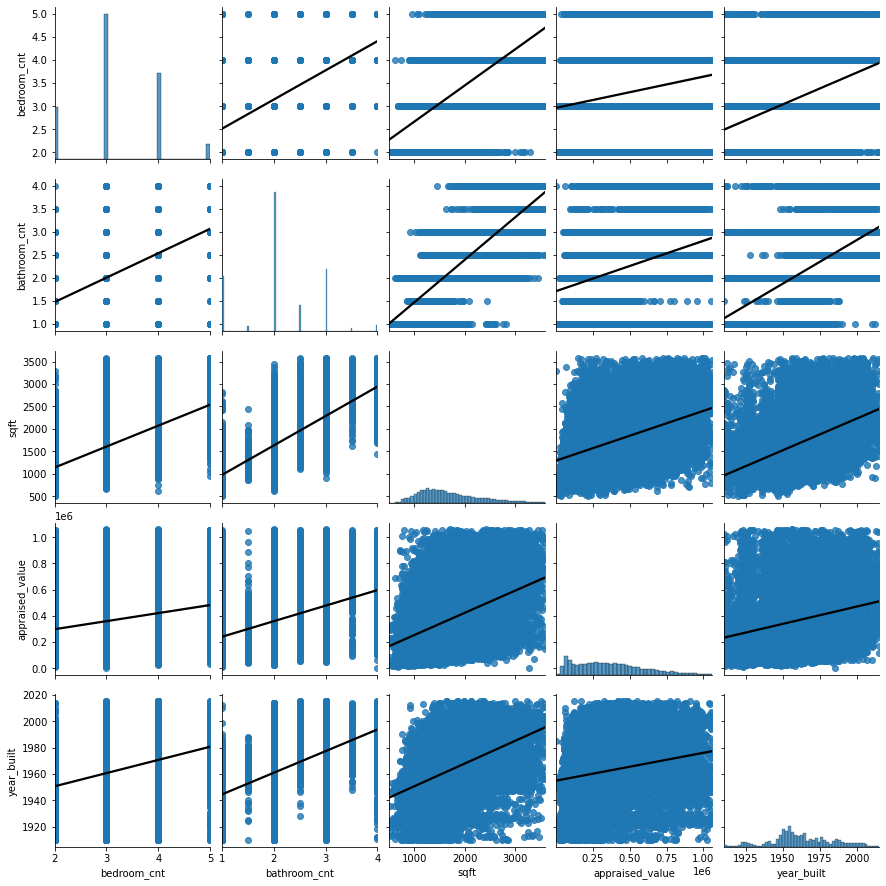

In [56]:
e.plot_variable_pairs(train_explore)

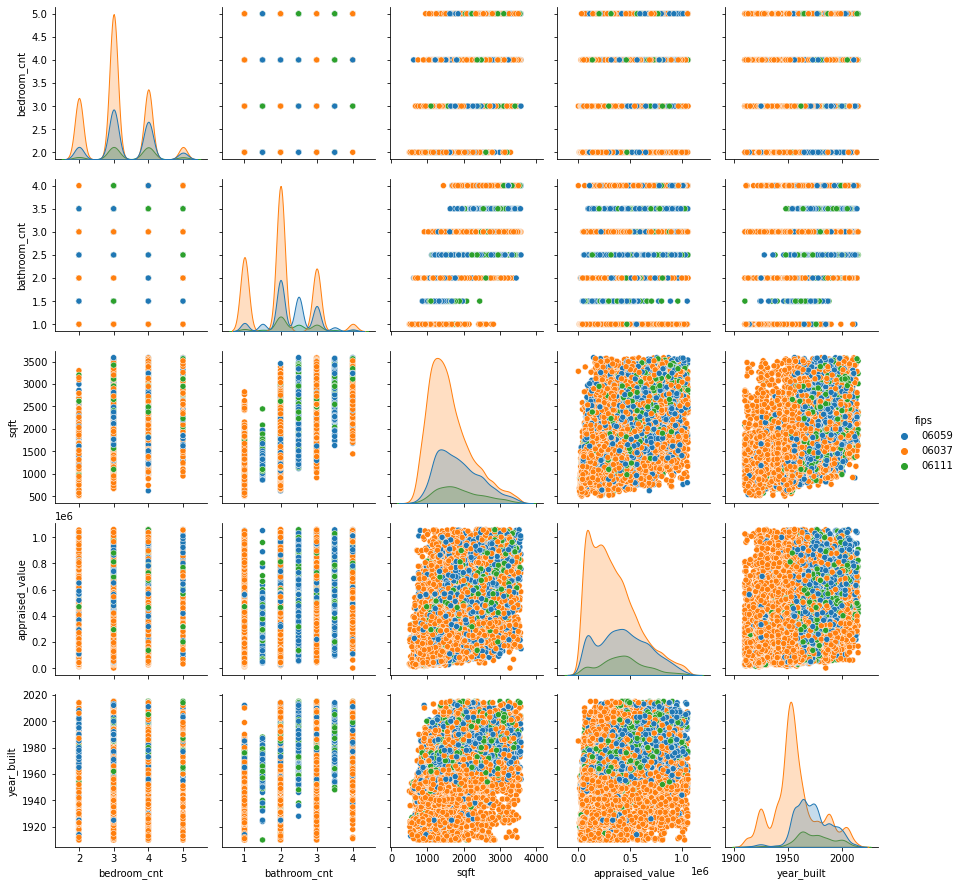

In [57]:
e.plot_variable_pairs_cat_hue(train_explore)

---
## Model/Evaluate
---

<AxesSubplot:>

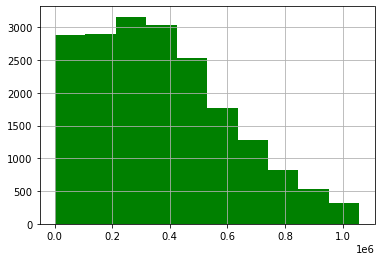

In [58]:
train_explore.appraised_value.hist(color='green')